In [1]:
from tensorflow.keras import datasets
from keras.utils import np_utils
# 데이터 준비
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print(y_train[:5])
#one hot encoding
y_train = np_utils.to_categorical(y_train)
print(y_train[:5])
y_test = np_utils.to_categorical(y_test)
L, W, H = X_train.shape
# -1 샘플의 개수
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)
X_train = X_train / 255.0
X_test = X_test / 255.0

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [2]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
# 분류 DNN 모델 구현 함수
def make_model(input_number, layers, output_number):
    #모델 초기화
    model = Sequential()
    model.add(Dense(layers[0], activation='relu', input_shape=(input_number,)))
    model.add(Dense(layers[1], activation='relu'))
    model.add(Dense(layers[2], activation='relu'))
    #드롭아웃 계층 Dropout(p) p라는 확률로
    # 출력 노드의 신호를 보내다 말다 함, 과적합 방지
    model.add(Dropout(0.2))
    #출력층(다분류-softmax)
    model.add(Dense(output_number, activation='softmax', name='output'))
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

In [7]:
input_number = 784 #28x28
#은닉계층 3개, 은닉노드수 128개, 64개, 32개
hidden_layers = [128, 64, 32]
number_of_class = 10
output_number = number_of_class
#모델 생성
model = make_model(input_number, hidden_layers, output_number)
model.summary()

[128, 64, 32]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [4]:
#모델 학습
hist = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 2s 3ms/step - loss: 0.5358 - accuracy: 0.8352 - val_loss: 0.1973 - val_accuracy: 0.9420
Epoch 2/5
375/375 [==============================] - 1s 2ms/step - loss: 0.2093 - accuracy: 0.9421 - val_loss: 0.1398 - val_accuracy: 0.9593
Epoch 3/5
375/375 [==============================] - 1s 2ms/step - loss: 0.1483 - accuracy: 0.9585 - val_loss: 0.1314 - val_accuracy: 0.9620
Epoch 4/5
375/375 [==============================] - 1s 2ms/step - loss: 0.1135 - accuracy: 0.9676 - val_loss: 0.1015 - val_accuracy: 0.9697
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0861 - accuracy: 0.9758 - val_loss: 0.0968 - val_accuracy: 0.9724


In [5]:
#모델 평가
model.evaluate(X_test, y_test, batch_size=128)

79/79 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9722


[0.0910905972123146, 0.9721999764442444]

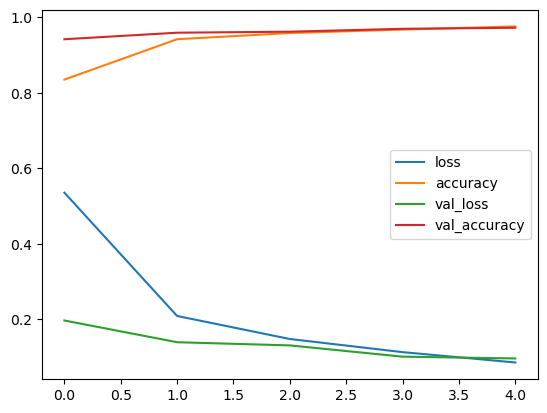

In [6]:
# 모델 학습 과정 표시
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.show()